## Dataset cachexia - Exploração de dados, pré-processamento e análise estatística univariada
Nesta secção vamos trabalhar com os dados do dataset Cachexia : 

*"Concentrations of 63 metabolites in 77 urine samples from cancer patients, measured by 1H NMR (Eisner et al, 2011). Metadata defines the two groups: control and cachexic patients."*

Importação e análise da dimensão dos dados

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
# para desenhar os gráficos dentro do notebook
%matplotlib inline


In [5]:
data = pd.read_csv('/Users/beatr/Mestrado/2ºano/si/datasets/data_cachexia.csv')
meta = pd.read_csv('/Users/beatr/Mestrado/2ºano/si/datasets/meta_cachexia.csv')
print (data.shape)
print (meta.shape)
data.head()

(77, 64)
(77, 2)


,Patient ID,1.6-Anhydro-beta-D-glucose,1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
0,PIF_178,40.85,65.37,18.73,26.05,71.52,1480.30,56.83,10.07,566.80,...,259.82,290.03,111.05,86.49,72.24,237.46,135.64,51.94,157.59,160.77
1,PIF_087,62.18,340.36,24.29,41.68,67.36,116.75,43.82,79.84,368.71,...,83.10,167.34,46.99,109.95,192.48,333.62,376.15,217.02,307.97,130.32
2,PIF_090,270.43,64.72,12.18,65.37,23.81,14.30,5.64,23.34,665.14,...,82.27,60.34,31.50,59.15,2164.62,330.30,86.49,58.56,145.47,83.93
3,NETL_005_V1,154.47,52.98,172.43,74.44,1199.91,555.57,175.91,25.03,411.58,...,235.10,323.76,30.57,102.51,125.21,1863.11,247.15,75.94,249.64,254.68
4,PIF_115,22.20,73.70,15.64,83.93,33.12,29.67,76.71,69.41,165.67,...,103.54,142.59,44.26,160.77,186.79,101.49,749.95,98.49,84.77,79.84


Sumário dos dados

In [ ]:
data.describe()

Sumário dos metadados 

In [ ]:
meta.describe()

**Ex. 1) Calcule a frequência de cada categoria nos metadados**

In [ ]:
meta.groupby("")

**Ex.2) Verifique que não há valores em falta nos dados.**

In [ ]:
data.isnull().sum().sum()

Para cada coluna apresentar o intervalo de valores

In [ ]:
data.apply(lambda x: str(x.min())+"---"+str( x.max()))

Criar um gráfico que permita visualizar os valores dos metabolitos "Alanine", "Citrate" e "Creatinine" para os pacientes de control. 

In [ ]:
data_control = data[meta["Muscle.loss"]=="control"]
data_control.iloc[:,[13,17,19]].plot.bar()

**Ex.3) Exemplo de discretização de dados - altere os dados do metabolito Citrate de valor continuo para discretos: 
    "elevado", "baixo" consoante o valor seja: maior ou menor que a média.**

Standardização dos dados (usando scikit-learn)

In [ ]:
from sklearn import preprocessing
array_data = preprocessing.scale(data)#, with_mean = False)
data_scale =  pd.DataFrame(array_data, index =data.index , columns = data.columns)
data_control = data_scale[meta["Muscle.loss"]=="control"]
data_control.iloc[:,[13,17,19]].plot.bar()

**Ex. 4) Cria um boxplot para ver a distribuição dos valores dos metabolitos Asparagine, Acetate, Succinate.**

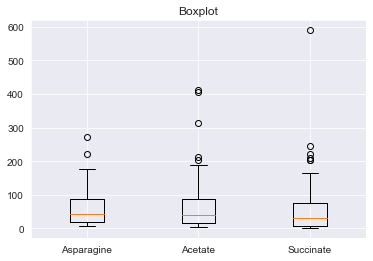

In [7]:
sel_data = data.loc[:,['Asparagine','Acetate','Succinate']].values
labels = ['Asparagine','Acetate','Succinate']

plt.boxplot(sel_data)
plt.xticks([1,2,3],labels)
plt.title("Boxplot")
plt.show()

Transformação logarítmica

In [ ]:
log_data = np.log2(data)
log_data.apply(lambda x: str(x.min())+"---"+str( x.max()))

In [ ]:
sel_log_data = log_data.iloc[:,indexes].values

plt.boxplot(sel_log_data)
plt.xticks([1,2,3],labels)
plt.title(" Boxplot")
plt.show()

**Ex. 5) Verifica se a distribuição do metabolito Alanine segue a distribuição normal quer de forma visual (QQplot), quer usando o teste de Shapiro.**

In [ ]:
import statsmodels.api as sm
from scipy import stats

In [ ]:
plt.close()
data_alanine = data.Alanine
plt.hist(data_alanine)

**Ex. 6) Verifica se a concentração de Alanina entre as duas categorias é semelhante, visualmente (usando histogramas) e usando testes estatísticos apropriados.**

In [ ]:
#utilizar teste não parametrico
# para ser correto estatisticamente, é testar se os valores de alanina para os 2 grupos, tem distribuição normal


Quais os metabolitos que têm concentrações significativamente diferentes entre os dois grupos: control e cachexic. 

In [ ]:
type(data[meta['Muscle.loss']=='control'])

In [ ]:
metabs_de_tt = lambda x : stats.ttest_ind(x[meta['Muscle.loss']=='control'],x[meta['Muscle.loss']=='cachexic'])

data.columns[data.apply(lambda x: metabs_de_tt(x)[1]<0.05)]

**Ex.7) Repita o anterior usando Testes não paramétricos - Mann-Whitney U test**

Correções para testes múltiplos

In [ ]:
pvalues_tt = data.apply(lambda x: metabs_de_tt(x)[1])
pvalues_tt
type(pvalues_tt)

In [ ]:
import statsmodels.stats as sm
corr_pvalues = sm.multitest.multipletests(pvalues_tt, method = "fdr_bh")[1]
corr_pvalues

### Correlações

In [ ]:
data_glucose = data.Glucose
data_sucrose = data.Sucrose

plt.scatter(data_glucose, data_sucrose)
plt.show()

In [ ]:
corr, _ = stats.pearsonr(data_glucose, data_sucrose)
corr

In [ ]:
sp_corr, _ = stats.spearmanr(data_glucose, data_sucrose)
sp_corr

In [ ]:
corr_matrix = data.corr()
corr_matrix

In [ ]:
type(corr_matrix)

In [ ]:
corr_matrix_sp = data.corr(method = "spearman")
corr_matrix_sp

In [ ]:
import seaborn as sn
sn.heatmap(corr_matrix.iloc[1:10,1:10], annot=True)
plt.show()

In [ ]:
sn.heatmap(corr_matrix.iloc[1:20,1:20], annot=False)
plt.show()

Análise de variância / regressão linear

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

lm = ols("data.Leucine~data.Valine", data).fit()
anova_lm(lm)

In [ ]:
lm.summary()

In [ ]:
lm.rsquared

**Ex.8) Repita o anterior adicionando a Glucose como variável dependente**

In [ ]:
data["MuscleLoss"] = meta["Muscle.loss"]

In [ ]:
lm3 = ols("data.Leucine~data.MuscleLoss", data).fit()

In [ ]:
lm3.summary()